In [136]:
import scipy.optimize as scop
import titanic_project as titan
import numpy as np
import matplotlib.pyplot as plt

features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']
datain = titan.readdata('train.csv', 0.6, 0.6, features)
datain['train'].describe()

,Survived,Pclass,Age,Sex,SibSp,Parch,Fare,Embarked
count,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000,343.000000
mean,0.387755,2.288630,28.544461,0.690962,0.556851,0.425656,34.606231,1.262391
std,0.487950,0.817258,14.047732,0.243284,1.003854,0.816236,52.494235,0.588349
min,0.000000,1.000000,0.830000,0.500000,0.000000,0.000000,0.000000,-3.000000
25%,0.000000,2.000000,20.000000,0.500000,0.000000,0.000000,8.050000,1.000000
50%,0.000000,3.000000,28.000000,0.500000,0.000000,0.000000,14.500000,1.000000
75%,1.000000,3.000000,36.000000,1.000000,1.000000,1.000000,31.387500,1.000000
max,1.000000,3.000000,71.000000,1.000000,5.000000,5.000000,512.329200,3.000000


In [137]:
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])
X = titan.normdata(X)
Xvad = titan.normdata(Xvad)

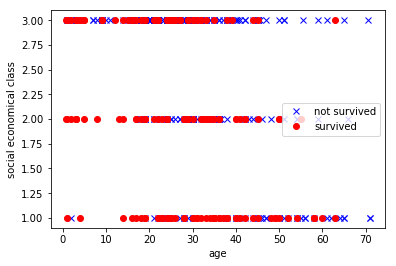

In [157]:
plt.plot(datain['train'].Age[y==0], datain['train'].Pclass[y==0], 'xb')
plt.plot(datain['train'].Age[y==1], datain['train'].Pclass[y==1], 'or')
plt.xlabel('age')
plt.ylabel('social economical class')
plt.legend(['not survived', 'survived'])
plt.show()

In [138]:
nfeature = X.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

In [139]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))

In [140]:
y_predict = titan.sigmoid(np.dot(X,w[0]))

In [141]:
y_predict[y_predict > 0.5] = 1

In [142]:
y_predict[y_predict <= 0.5] = 0

In [143]:
(y_predict == y).sum()*1.0/y.size

0.79300291545189505

In [144]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.5
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)

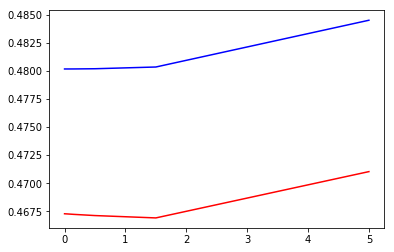

In [145]:
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.show()

In [146]:
tp = np.linspace(0.2, 0.7, 20)

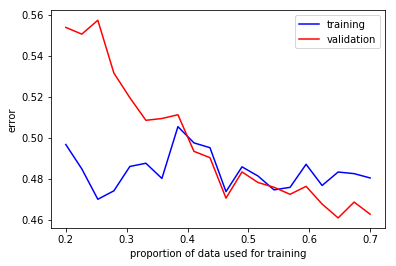

In [147]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    nfeature = X.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (X, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, X, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvad, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve suggests at leat 60% of the train.csv dataset is needed to produce a reasonable model. 

In [149]:
datain = titan.readdata('train.csv', 0.7, 0.7, features)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

In [150]:
Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

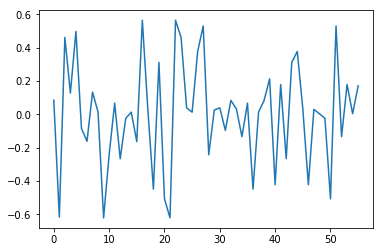

In [151]:
w = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))
plt.plot(w[0])
plt.show()

The figure above shows the weight of each features used in the 2nd order polynomial model. Some parameters stood out while some have very little contributions to the regression.

In [152]:
y_predict = titan.sigmoid(np.dot(Xq,w[0]))
y_predict[y_predict > 0.5] = 1
y_predict[y_predict <= 0.5] = 0
(y_predict == y).sum()*1.0/y.size

0.81909547738693467

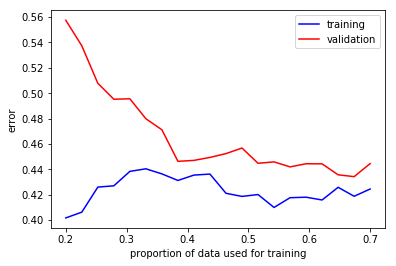

In [153]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    Xq = titan.normdata(titan.xquad(X))
    Xvadq = titan.normdata(titan.xquad(Xvad))
    nfeature = Xq.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The learning curve suggests that with training data more than 50% of the train.csv dataset the model is able to avoid being overfitting, which is a problem with less than 40% of the data used for training. The absolute error for the validation set is smaller compared to the linear model, suggesting adding 2nd order terms improves the performance of the regression. To further reduce the error, we can try more complex set of features or models more advanced than logistic regression.

In [154]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,w[0]))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.81703470031545744

The 2nd order terms gives an accuracy of 82% in the validation set.

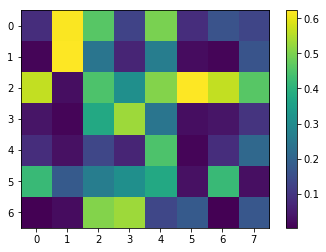

In [156]:
plt.imshow(np.abs(w[0].reshape(7, 8)))
plt.colorbar()
plt.show()

The heat map of parameters shows the most important features are Sex, Age, and Pclass. 

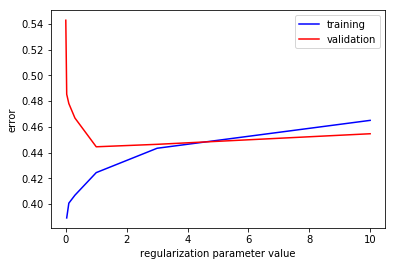

In [68]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10])
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The figure above suggests the optimum regularization parameter to use is 1. 

Now we take Age out of the input features to test the model. A large number of passengers on the list doesn't have age information available. Therefore it is important to find a model works for those passengers.

In [118]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked']

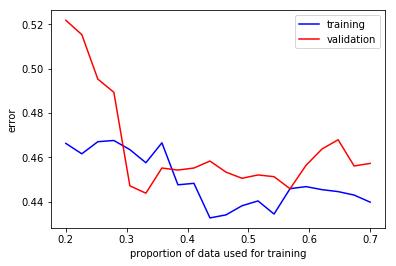

In [119]:
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    Xq = titan.normdata(titan.xquad(X))
    Xvadq = titan.normdata(titan.xquad(Xvad))
    nfeature = Xq.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

As expected, the error increased without Age information. But still close to the original model. The learning curve suggests adding more data improves the performance on training and validation set.

In [120]:
datain = titan.readdata('train.csv', 0.6, 0.6, features)
X = np.array(datain['train'].ix[:,1:])
y = np.array(datain['train'].ix[:,0])
Xvad = np.array(datain['validation'].ix[:,1:])
yvad = np.array(datain['validation'].ix[:,0])

In [121]:
Xq = titan.normdata(titan.xquad(X))
Xvadq = titan.normdata(titan.xquad(Xvad))

nfeature = Xq.shape[1]
theta0 = np.zeros(shape = (nfeature, 1))
regpara = 1.0

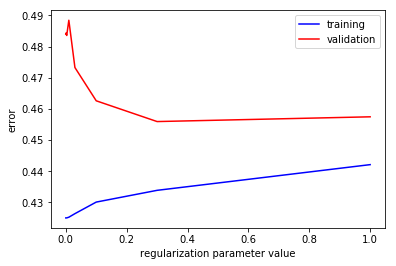

In [122]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.1
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

The figure above sugests that the optimum regularization parameter to use is 0.3. Using this value and the optimum training data set size (60% of total data), we estimate the accuracy of the model

In [123]:
theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, 0.3))[0]

In [124]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,theta))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.80112044817927175

The model is only 80% accurate, a bit less than the model with Age information. We can map out the relative importance of different features. In the following figure, the features are sorted as: 'Pclass', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked'

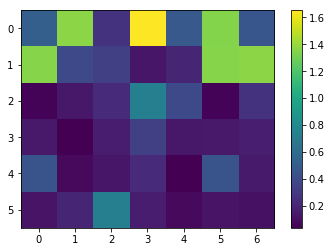

In [126]:
plt.imshow(np.abs(theta.reshape(6, 7)))
plt.colorbar()
plt.show()

It is obvious the first two features 'Pclass' and 'Sex' are the most important factors. The relative magnitude also suggests that the 4th feature, the Parch, is relativley unimportant. Perhapse the feture itself is not very diagnostic. We experiment by taking Fare out of the feature list and retrain the model.

In [127]:
features = ['Survived', 'Pclass', 'Sex', 'SibSp', 'Fare', 'Embarked']

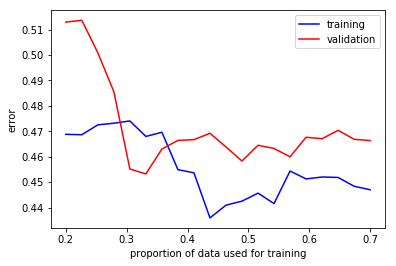

In [128]:
tp = np.linspace(0.2, 0.7, 20)
trainerror = np.zeros(shape = (tp.size, 1))
vaderror = np.zeros(shape = (tp.size, 1))
for i in range(0, tp.size):
    datain = titan.readdata('train.csv', tp[i], 0.7, features)
    X = np.array(datain['train'].ix[:,1:])
    y = np.array(datain['train'].ix[:,0])
    Xvad = np.array(datain['validation'].ix[:,1:])
    yvad = np.array(datain['validation'].ix[:,0])
    Xq = titan.normdata(titan.xquad(X))
    Xvadq = titan.normdata(titan.xquad(Xvad))
    nfeature = Xq.shape[1]
    theta0 = np.zeros(shape = (nfeature, 1))
    regpara = 1.0
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.plot(tp, trainerror, '-b', tp, vaderror,'-r')
plt.xlabel('proportion of data used for training')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

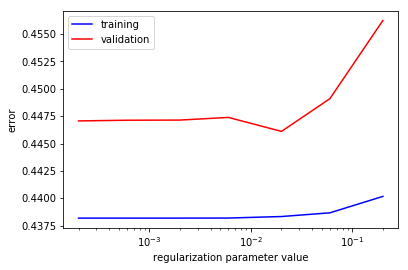

In [133]:
regpara = np.array([0, 0.01, 0.03, 0.1, 0.3, 1, 3, 10]) * 0.02
trainerror = np.zeros(shape = (regpara.size, 1))
vaderror = np.zeros(shape = (regpara.size, 1))

for i in range(0, regpara.size):
    theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, regpara[i]))[0]
    trainerror[i] = titan.lfCost(theta, Xq, y, 0.0)
    vaderror[i] = titan.lfCost(theta, Xvadq, yvad, 0.0)
plt.semilogx(regpara, trainerror, '-b', regpara, vaderror,'-r')
plt.xlabel('regularization parameter value')
plt.ylabel('error')
plt.legend(['training','validation'])
plt.show()

In [134]:
theta = scop.fmin_l_bfgs_b(titan.lfCost, theta0, titan.lfGradient, (Xq, y, 0.02))[0]

In [135]:
yvad_predict = titan.sigmoid(np.dot(Xvadq,theta))
yvad_predict[yvad_predict > 0.5] = 1
yvad_predict[yvad_predict <= 0.5] = 0
(yvad_predict == yvad).sum()*1.0/yvad.size

0.78358208955223885

Without Age the model accuracy drops by 2-3% in the validation dataset. We try to recover the age information from other information available. After carefully examining the data, it seems a person's title is loosely correlated to the person's age. For example, those with the title 'Master' are usually children and have younger ages. Here I group passengers by sex, social class, and title. For those without age i the data base I assign the median age of the group they belong to as their age.

The first step is to parse the name to get titles.

In [158]:
features = ['Survived', 'Pclass', 'Age', 'Sex', 'SibSp', 'Parch', 'Fare','Embarked','Name']
datain = titan.readdata('train.csv', 0.6, 0.6, features)

In [161]:
datain['train'].Name

0                                Braund, Mr. Owen Harris
1      Cumings, Mrs. John Bradley (Florence Briggs Th...
2                                 Heikkinen, Miss. Laina
3           Futrelle, Mrs. Jacques Heath (Lily May Peel)
4                               Allen, Mr. William Henry
6                                McCarthy, Mr. Timothy J
7                         Palsson, Master. Gosta Leonard
8      Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)
9                    Nasser, Mrs. Nicholas (Adele Achem)
10                       Sandstrom, Miss. Marguerite Rut
11                              Bonnell, Miss. Elizabeth
12                        Saundercock, Mr. William Henry
13                           Andersson, Mr. Anders Johan
14                  Vestrom, Miss. Hulda Amanda Adolfina
15                      Hewlett, Mrs. (Mary D Kingcome) 
16                                  Rice, Master. Eugene
18     Vander Planke, Mrs. Julius (Emelia Maria Vande...
20                             

The name entry has a fixed format: First name, comma, title, period, last name, then other names.
The split() method for string in Python provides an easy way to split the different parts and retain the title. For example:

In [165]:
datain['train'].Name[0].split(',')[1].split('.')[0]

' Mr'

In [185]:
def name2title(name):
    return name.split(',')[1].split('.')[0]

In [186]:
title = datain['train'].Name.apply(name2title)

In [189]:
title.value_counts()

 Mr        185
 Miss       81
 Mrs        49
 Master     20
 Dr          3
 Rev         3
 Don         1
 Mme         1
Name: Name, dtype: int64